import google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


import libraries

In [2]:
!pip install tensorflow matplotlib

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.src.legacy.preprocessing.image import ImageDataGenerator

Setting paths

In [3]:
data_dir = '/content/drive/MyDrive/plant_disease_project/dataset/PlantVillage'
model_save_path = '/content/drive/MyDrive/plant_disease_project/model/plant_disease_model.h5'


 Preprocess Images + Create Train/Val Split (80/20)

In [4]:
img_height = 128
img_width = 128
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)


Found 16571 images belonging to 15 classes.
Found 4136 images belonging to 15 classes.


Build the CNN Model

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(train.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,394,255 (28.21 MB)

 Trainable params: 7,394,255 (28.21 MB)

 Non-trainable params: 0 (0.00 B)

Train the Model

In [ ]:
history = model.fit(train, epochs=2, validation_data=val)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
518/518 ━━━━━━━━━━━━━━━━━━━━ 835s 2s/step - accuracy: 0.3206 - loss: 2.1694 - val_accuracy: 0.6659 - val_loss: 1.0562
Epoch 2/2
518/518 ━━━━━━━━━━━━━━━━━━━━ 477s 920ms/step - accuracy: 0.5999 - loss: 1.2314 - val_accuracy: 0.7809 - val_loss: 0.6991


Save the Model

In [ ]:
model.save(model_save_path)
print(f"Model saved to: {model_save_path}")


Model saved to: /content/drive/MyDrive/plant_disease_project/model/plant_disease_model.h5


Plot Accuracy & Loss

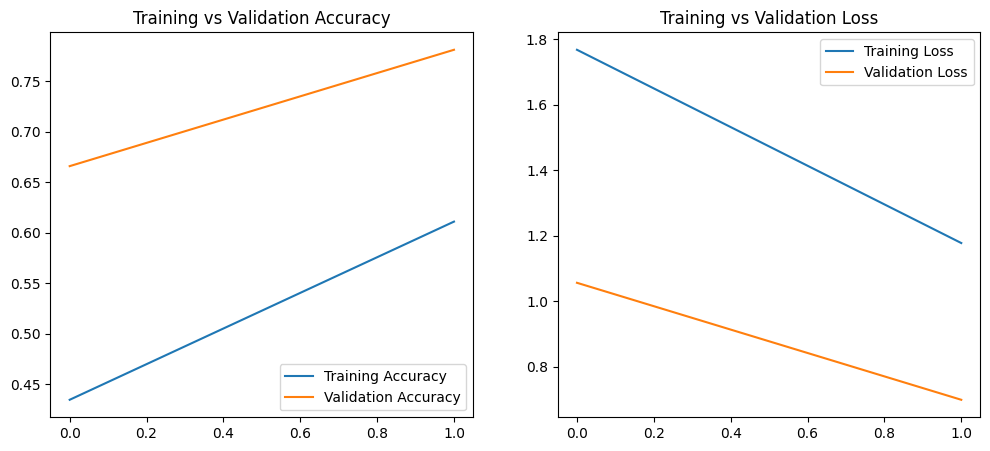

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training vs Validation Loss')

plt.show()


Predict on a New Image

In [ ]:
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

def predict_image(img_path):
    img = load_img(img_path, target_size=(img_height, img_width))
    img_array = img_to_array(img) / 255.
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    class_labels = list(train.class_indices.keys())
    print("Predicted class:", class_labels[predicted_class])


predict_image('/content/drive/MyDrive/plant_disease_project/dataset/PlantVillage/Tomato_Late_blight/72e49321-5eeb-4669-9641-0e9146da9159___RS_Late.B 5102.JPG')
predict_image('/content/drive/MyDrive/plant_disease_project/dataset/PlantVillage/Tomato_healthy/4e88356d-0238-4f3c-b718-34bddc184407___RS_HL 0136.JPG')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted class: Tomato_Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted class: Tomato_healthy


diplay data properties

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2

# Set path to your dataset folder
data_dir = '/content/drive/MyDrive/plant_disease_project/dataset/PlantVillage' # Make sure this path is correct

# Check if the directory exists
if not os.path.isdir(data_dir):
    print(f"Error: Directory not found at {data_dir}")
    print("Please verify the path and ensure Google Drive is mounted correctly.")
else:
    # List all class folders
    classes = sorted(os.listdir(data_dir))
    print(f"🧾 Total number of classes: {len(classes)}")
    print("📂 Class names:", classes)

    # Count total images and per class
    total_images = 0
    class_counts = {}

    for cls in classes:
        cls_path = os.path.join(data_dir, cls)
        if os.path.isdir(cls_path):
            count = len(os.listdir(cls_path))
            class_counts[cls] = count
            total_images += count

    print(f"\n🖼️ Total number of images: {total_images}")
    print("\n📊 Images per class:")
    for cls, count in class_counts.items():
        print(f"  {cls}: {count}")


🧾 Total number of classes: 15
📂 Class names: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']

🖼️ Total number of images: 20708

📊 Images per class:
  Pepper__bell___Bacterial_spot: 997
  Pepper__bell___healthy: 1478
  Potato___Early_blight: 1000
  Potato___Late_blight: 1000
  Potato___healthy: 152
  Tomato_Bacterial_spot: 2137
  Tomato_Early_blight: 1000
  Tomato_Late_blight: 1929
  Tomato_Leaf_Mold: 952
  Tomato_Septoria_leaf_spot: 1781
  Tomato_Spider_mites_Two_spotted_spider_mite: 1676
  Tomato__Target_Spot: 1404
  Tomato__Tomato_YellowLeaf__Curl_Virus: 3229
  Tomato__Tomato_mosaic_virus: 382
  Tomato_healthy: 1591


In [ ]:
import os

folder_path = '/content/drive/MyDrive/plant_disease_project/dataset/PlantVillage/Tomato_Late_blight'
print(os.listdir(folder_path))

['72e49321-5eeb-4669-9641-0e9146da9159___RS_Late.B 5102.JPG', '78122366-5c83-4d3f-97b0-b7135181738b___GHLB Leaf 1 Day 1.JPG', '734daa60-b419-4736-ae19-c84fc2043d97___RS_Late.B 6758.JPG', '6e45480a-127e-4173-9402-7b724728a139___RS_Late.B 4837.JPG', '9ec534c9-70e3-43de-876e-3bfd87ef324c___RS_Late.B 5163.JPG', '7a08fe4d-cb32-4a4e-861e-249e582fb8c8___GHLB2 Leaf 8820.JPG', '7fe41e8b-a062-4403-97b1-0415e2cf8fc5___RS_Late.B 7055.JPG', '71a47848-146e-4cda-ae09-5ff0fe3a0540___GHLB2 Leaf 80.1.JPG', '7e322351-379f-4b07-8001-01baf6bf589c___RS_Late.B 7038.JPG', '7f8eaaf9-901f-4628-b706-7257b3e67303___RS_Late.B 6025.JPG', '7e409fcc-0ff7-4d05-9852-e0f4495db3e8___RS_Late.B 6195.JPG', '90e52dd6-f8ef-407f-a854-04200696dfe2___RS_Late.B 5375.JPG', '98586693-fe1f-4ea0-8e27-4501b61cf09b___GHLB_PS Leaf 23.5 Day 13.jpg', '77cd23c3-22fe-4d04-babe-89db464dbddd___GHLB Leaf 6 Day 6.JPG', '867d2544-e985-4d01-ae0c-9e8d053f6c61___GHLB2 Leaf 9071.JPG', 'ac1fbb8a-2a44-4d70-8c93-fc3cc13a876d___GHLB_PS Leaf 17 Day 8.jpg